# AT2 - Retail dataset preperation and modelling for prediction - SGD Regression by splitting the dataset using time based split and not having the event type as a feature

# 1. Loading the dataset

## 1.1. Launch commands to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

## 1.2. Import the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To ensure plots are displayed in Jupyter notebooks
%matplotlib inline

## 1.3. Load the training and test dataset into a dataframes

In [3]:
# Load the training and test datasets into data frames 
# Load the Parquet files into DataFrames
df_train = pd.read_parquet('../../data/interim/price_merged_train_data.parquet')
df_test = pd.read_parquet('../../data/interim/price_merged_test_data.parquet')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815174 entries, 0 to 34815173
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             object        
 1   item_id        object        
 2   dept_id        object        
 3   cat_id         object        
 4   store_id       object        
 5   state_id       object        
 6   d              object        
 7   sales          int64         
 8   date           datetime64[ns]
 9   wm_yr_wk       int64         
 10  day_index      int64         
 11  day_name       object        
 12  month          int32         
 13  event_type     object        
 14  sell_price     float64       
 15  sales_revenue  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(9)
memory usage: 4.0+ GB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160986 entries, 0 to 12160985
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             object        
 1   item_id        object        
 2   dept_id        object        
 3   cat_id         object        
 4   store_id       object        
 5   state_id       object        
 6   d              object        
 7   sales          int64         
 8   date           datetime64[ns]
 9   wm_yr_wk       int64         
 10  day_index      int64         
 11  day_name       object        
 12  month          int32         
 13  event_type     object        
 14  sell_price     float64       
 15  sales_revenue  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(9)
memory usage: 1.4+ GB


## 1.4 Missing data check

In [6]:
# Check for missing values in df_train
missing_train = df_train.isnull().sum()
print("Missing values in Training Data:")
print(missing_train[missing_train > 0])  # Display only columns with missing values

# Check for missing values in df_test
missing_test = df_test.isnull().sum()
print("\nMissing values in Testing Data:")
print(missing_test[missing_test > 0])  # Display only columns with missing values

Missing values in Training Data:
Series([], dtype: int64)

Missing values in Testing Data:
Series([], dtype: int64)


# 2.0 Data Preperation 

 ## 2.1 Installing the custom package with pip

In [7]:
! pip install -i https://test.pypi.org/simple/ my_krml_pine==2024.0.1.18

Looking in indexes: https://test.pypi.org/simple/


## 2.2 import custom functions

In [8]:
from my_krml_pine.models.null import NullRegressor
from my_krml_pine.models.performance import print_regressor_scores
from my_krml_pine.data.datavisuals import plot_time_series, plot_unique_item_count

## 2.3 Visualising the dataset

### 2.3.1 visualising the sales over time

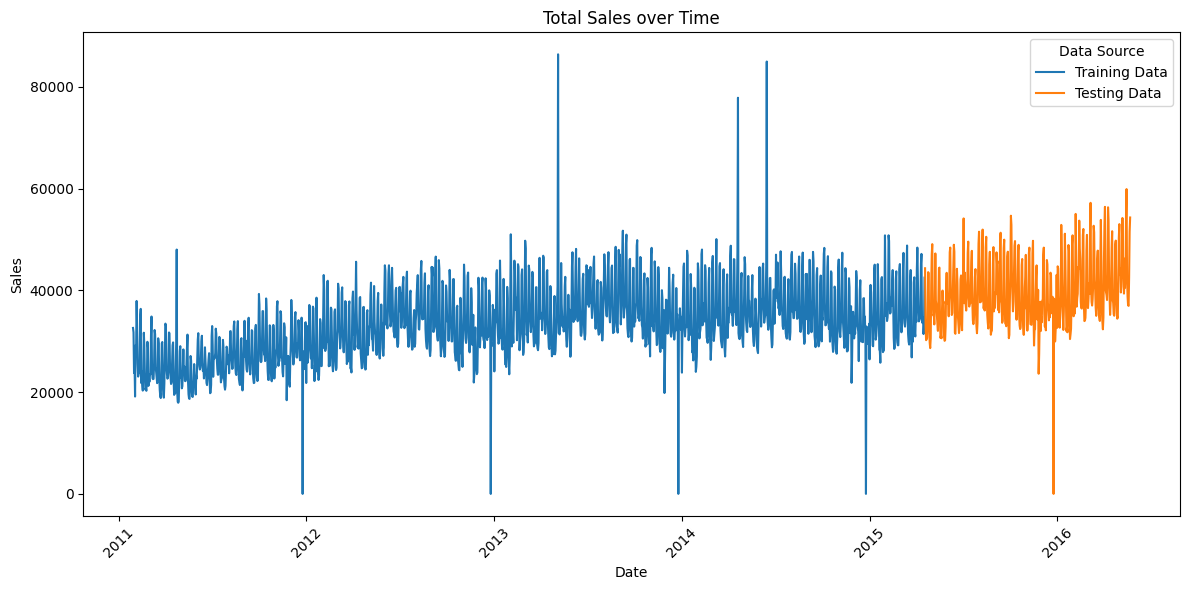

In [9]:
plot_time_series(df_train, 'date', 'sales', df_test, title='Total Sales over Time', xlabel='Date', ylabel='Sales')

### 2.3.2 Overview of the state wise - stores and items

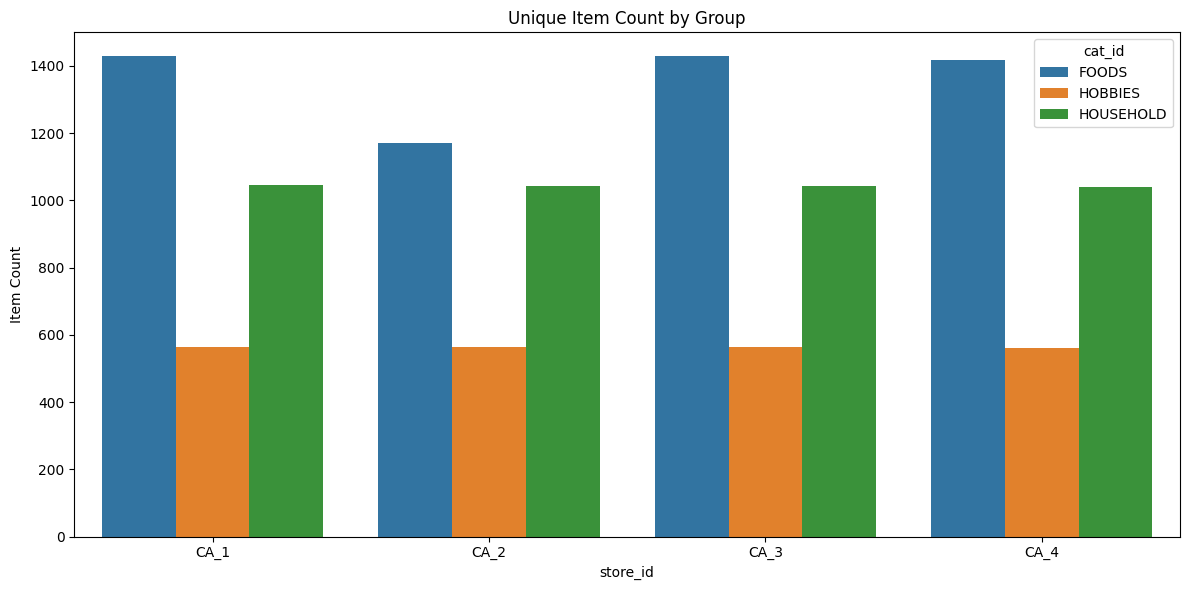

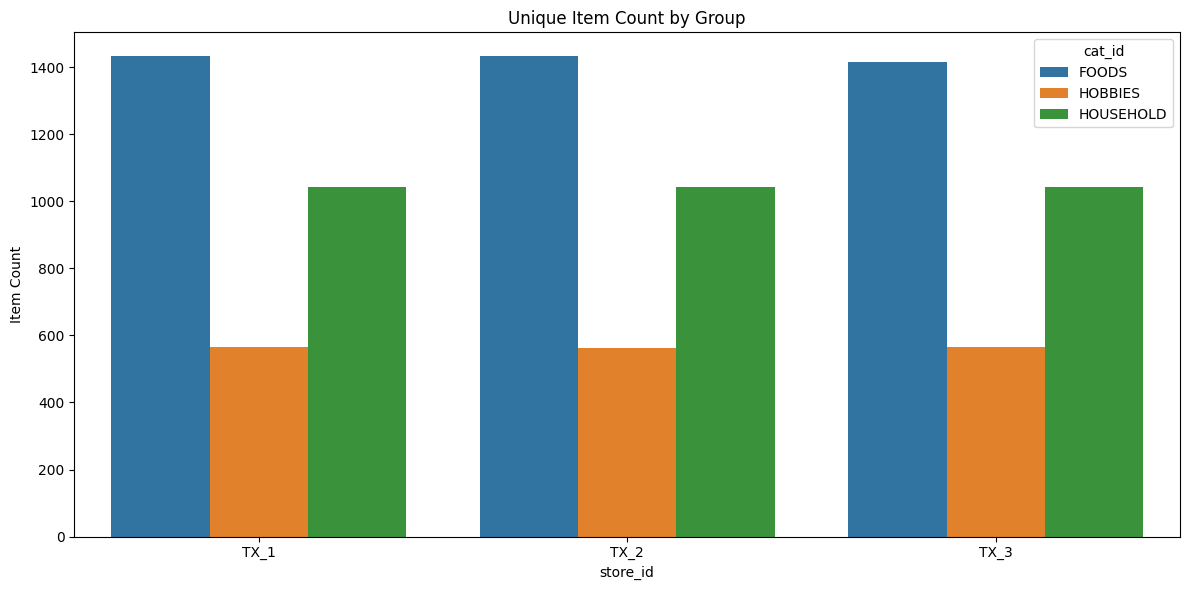

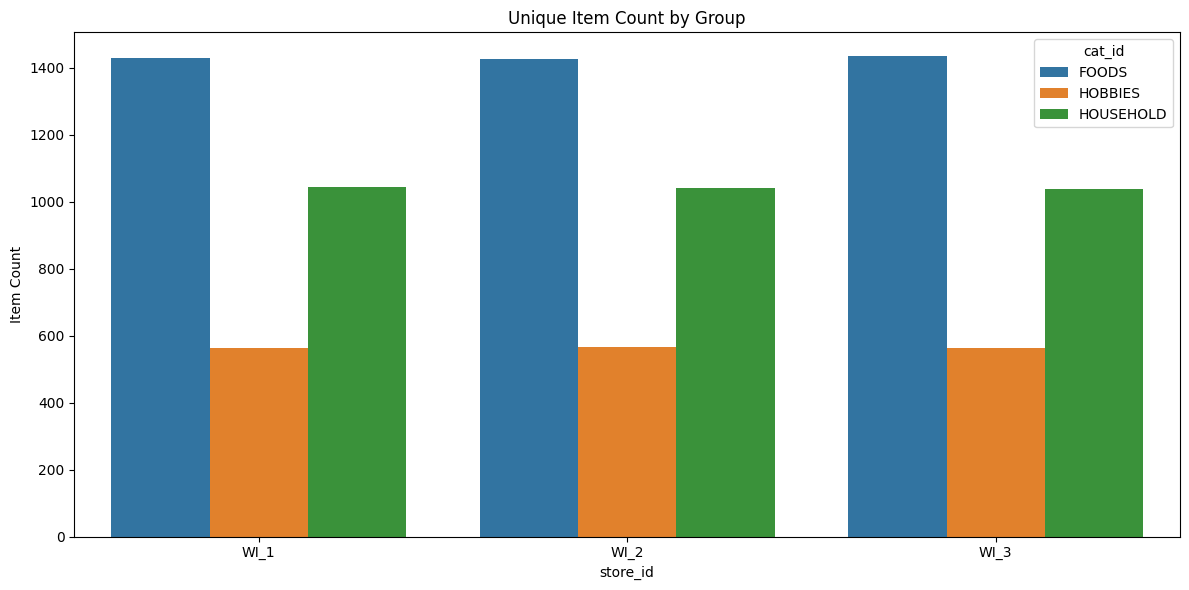

In [10]:
# Training Data
states = ['CA', 'TX', 'WI']
for state in states:
    plot_unique_item_count(df_train, ['store_id', 'cat_id'], 'item_id', 'state_id', state)


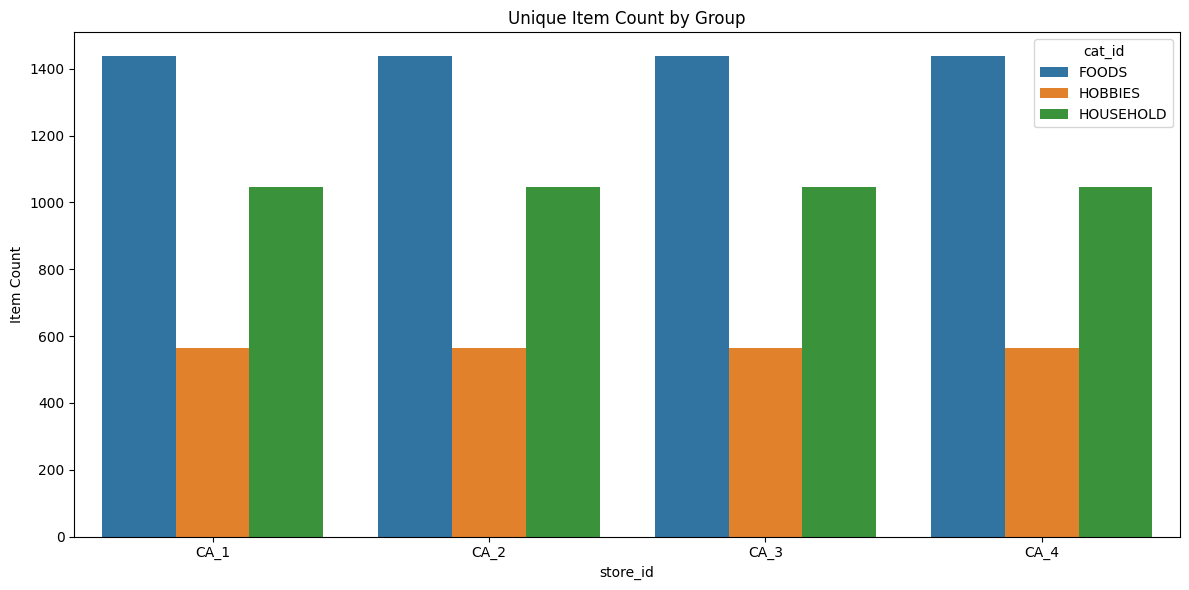

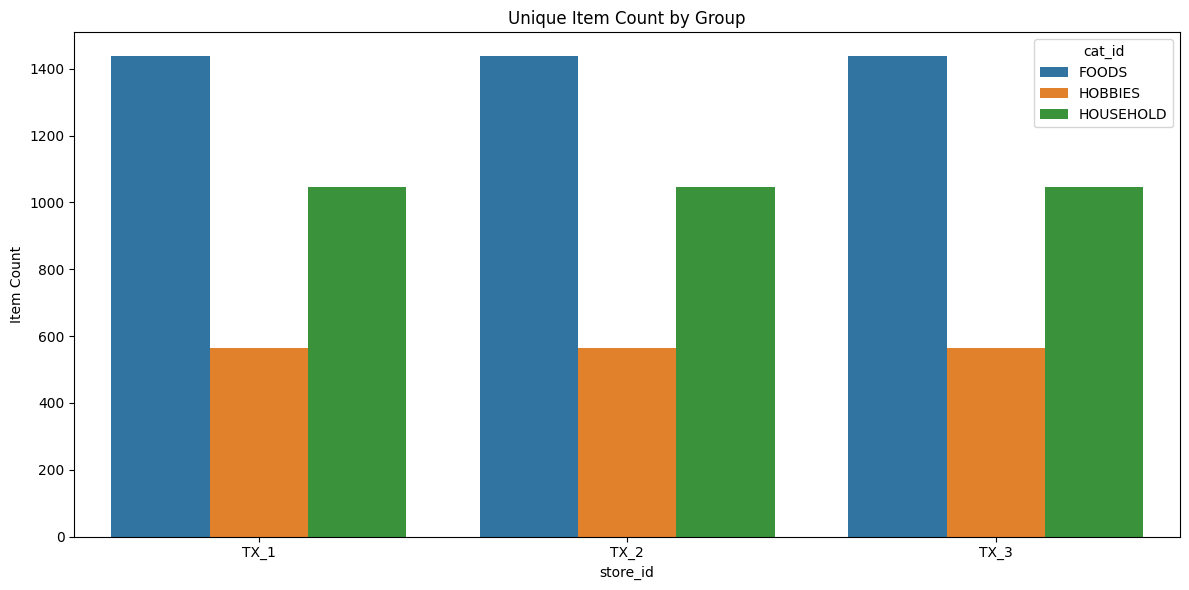

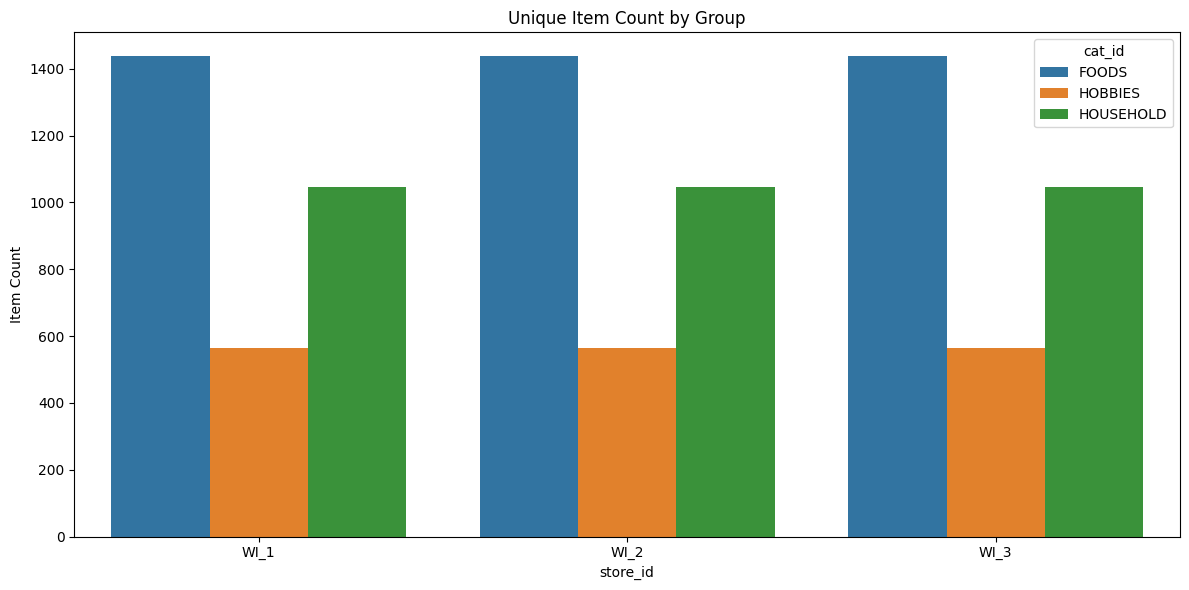

In [11]:
# Test data
states = ['CA', 'TX', 'WI']
for state in states:
    plot_unique_item_count(df_test, ['store_id', 'cat_id'], 'item_id', 'state_id', state)

### 2.3.3 Visualising 'sales revenue' over time

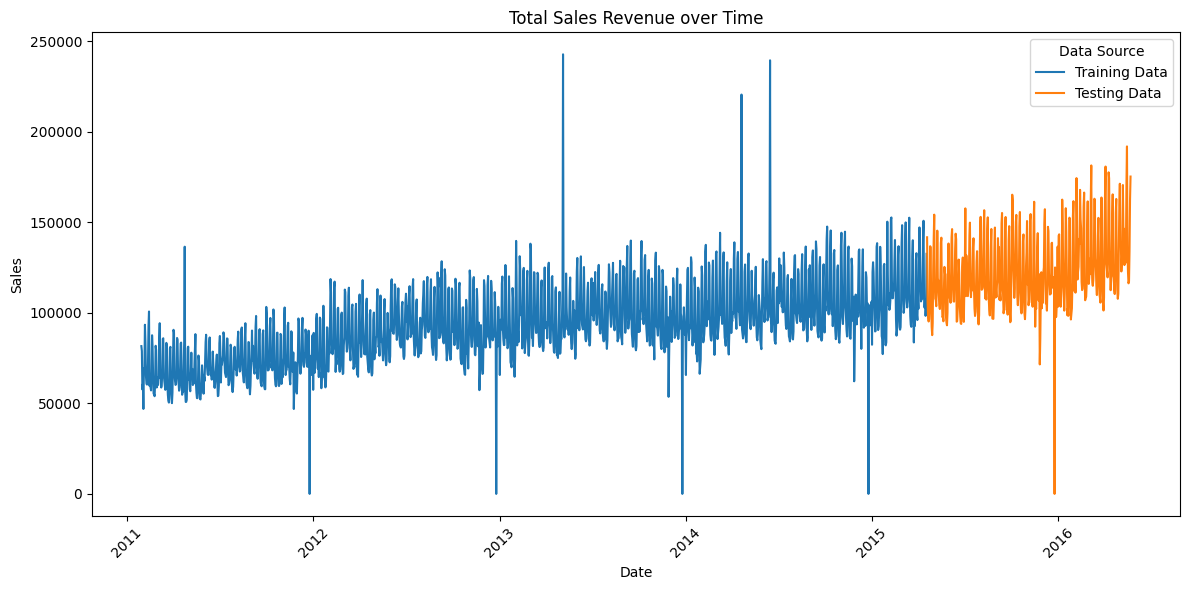

In [12]:
plot_time_series(df_train, 'date', 'sales_revenue', df_test, title='Total Sales Revenue over Time', xlabel='Date', ylabel='Sales')

### 2.3.4 Visualising 'zero sales'

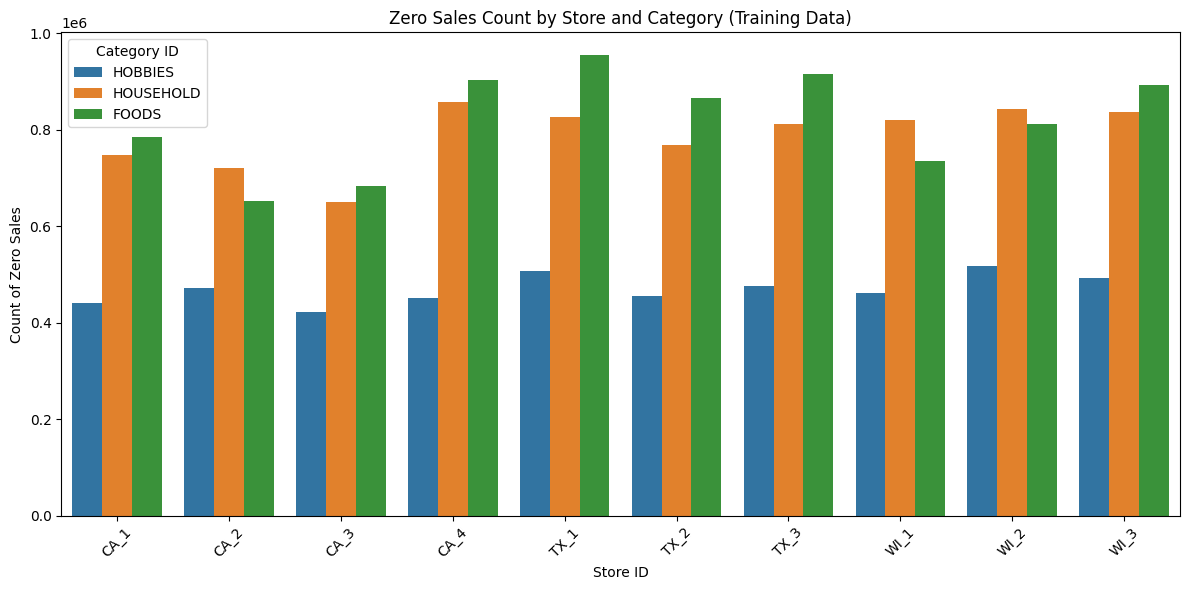

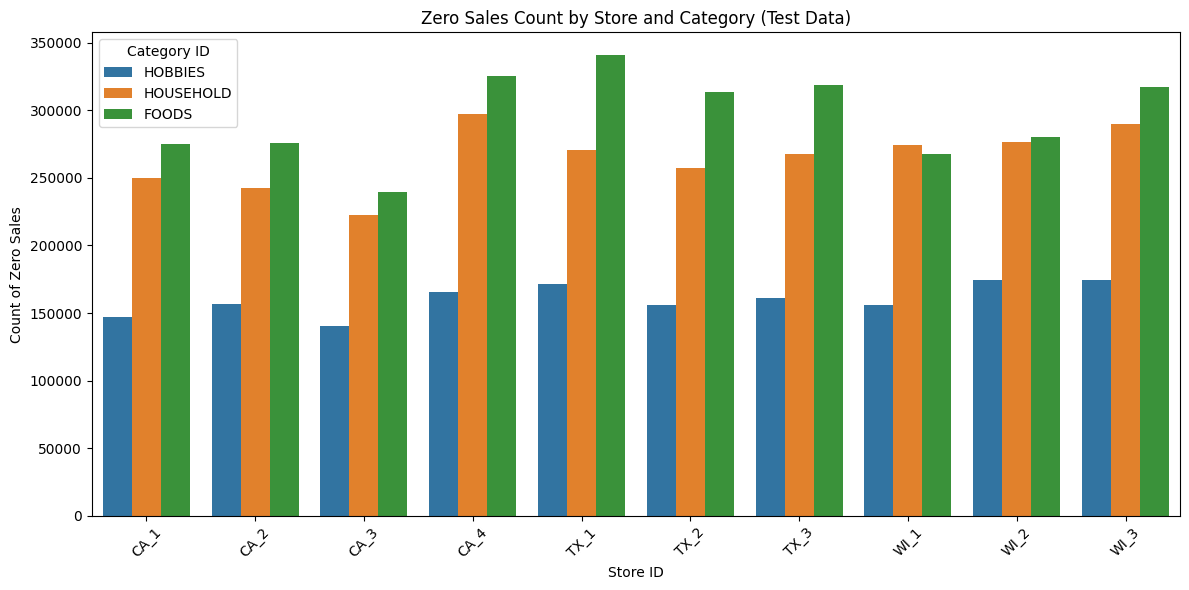

In [13]:
## More analysis on zero sales 
zero_sales_train = df_train[df_train['sales_revenue'] == 0]
zero_sales_test = df_test[df_test['sales_revenue'] == 0]

# Plotting zero sales in training data
plt.figure(figsize=(12, 6))
sns.countplot(data=zero_sales_train, x='store_id', hue='cat_id')
plt.title('Zero Sales Count by Store and Category (Training Data)')
plt.xlabel('Store ID')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.legend(title='Category ID')
plt.tight_layout()
plt.show()

# Plotting zero sales in testing data
plt.figure(figsize=(12, 6))
sns.countplot(data=zero_sales_test, x='store_id', hue='cat_id')
plt.title('Zero Sales Count by Store and Category (Test Data)')
plt.xlabel('Store ID')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.legend(title='Category ID')
plt.tight_layout()
plt.show()

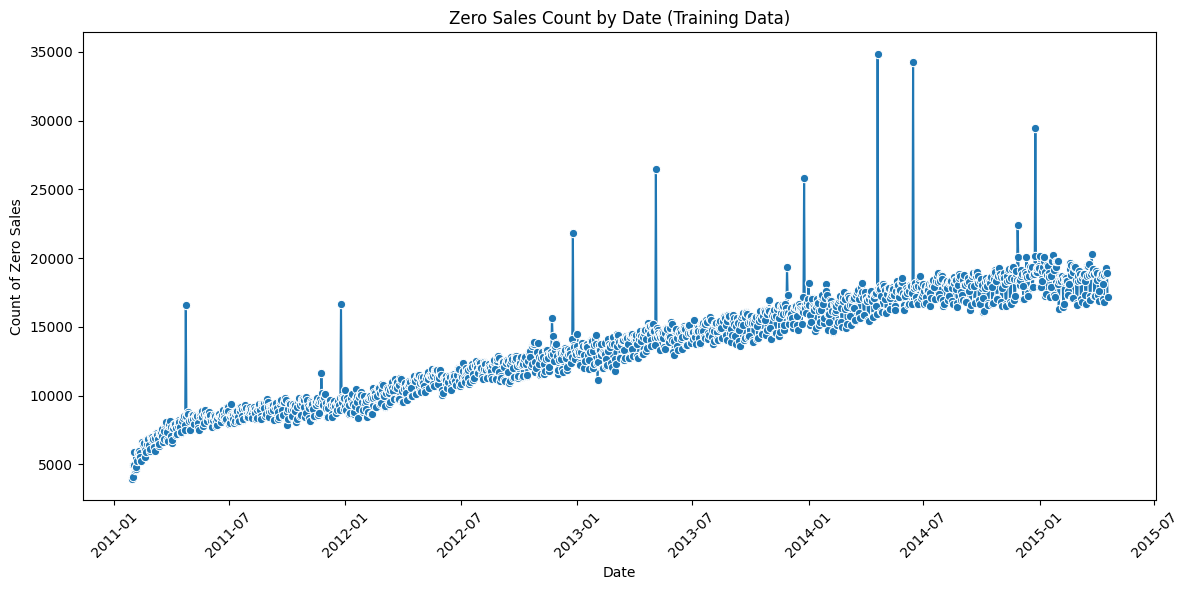

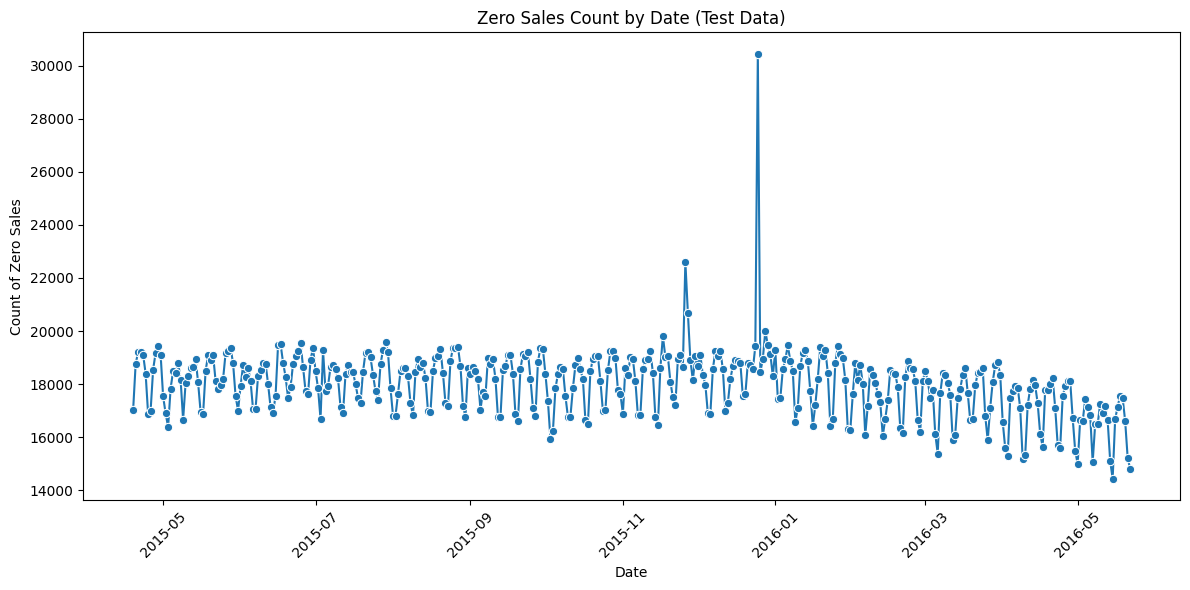

In [14]:
### Zero sales count by date
# Group by date and count zero sales occurrences in training data
zero_sales_by_date_train = zero_sales_train.groupby('date').size().reset_index(name='zero_sales_count')

# Group by date and count zero sales occurrences in testing data
zero_sales_by_date_test = zero_sales_test.groupby('date').size().reset_index(name='zero_sales_count')

# Plotting zero sales by date for training data
plt.figure(figsize=(12, 6))
sns.lineplot(data=zero_sales_by_date_train, x='date', y='zero_sales_count', marker='o')
plt.title('Zero Sales Count by Date (Training Data)')
plt.xlabel('Date')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting zero sales by date for testing data
plt.figure(figsize=(12, 6))
sns.lineplot(data=zero_sales_by_date_test, x='date', y='zero_sales_count', marker='o')
plt.title('Zero Sales Count by Date (Test Data)')
plt.xlabel('Date')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

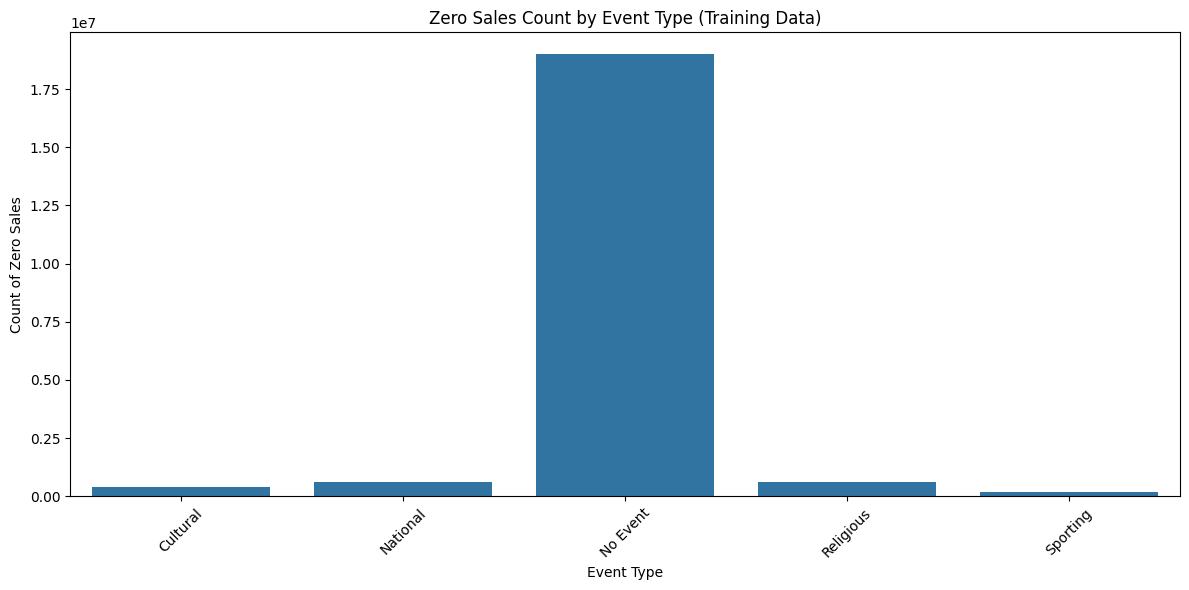

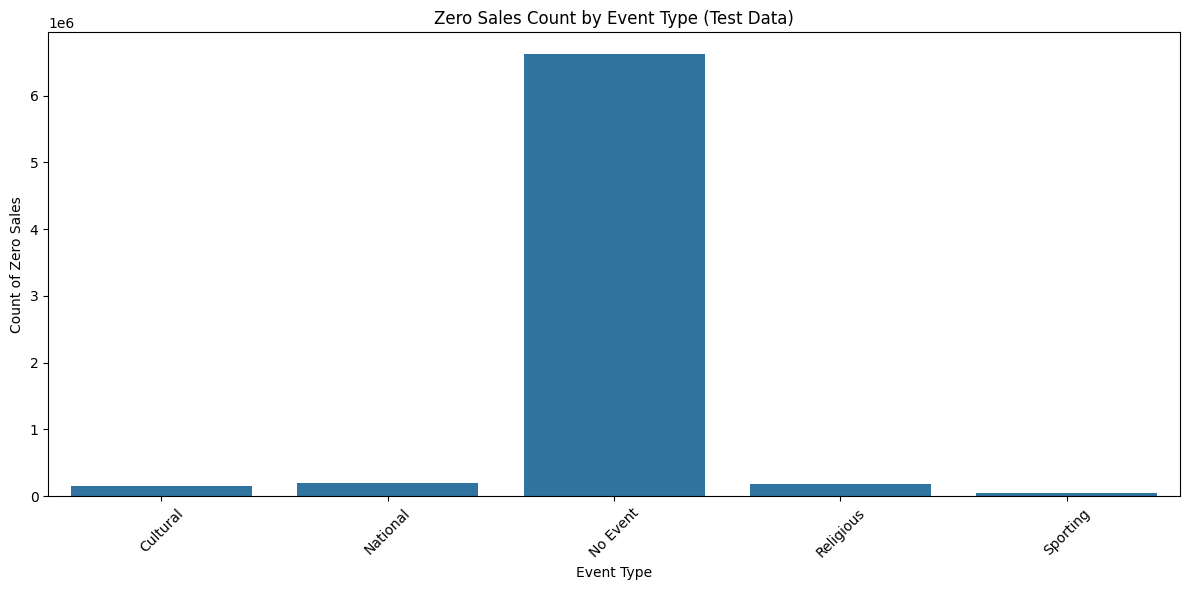

In [15]:
### Zero sales count by 'Event Type'
# Group by event type and count zero sales occurrences in training data
zero_sales_by_event_train = zero_sales_train.groupby('event_type').size().reset_index(name='zero_sales_count')

# Group by event type and count zero sales occurrences in testing data
zero_sales_by_event_test = zero_sales_test.groupby('event_type').size().reset_index(name='zero_sales_count')

# Plotting zero sales by event type for training data
plt.figure(figsize=(12, 6))
sns.barplot(data=zero_sales_by_event_train, x='event_type', y='zero_sales_count')
plt.title('Zero Sales Count by Event Type (Training Data)')
plt.xlabel('Event Type')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting zero sales by event type for testing data
plt.figure(figsize=(12, 6))
sns.barplot(data=zero_sales_by_event_test, x='event_type', y='zero_sales_count')
plt.title('Zero Sales Count by Event Type (Test Data)')
plt.xlabel('Event Type')
plt.ylabel('Count of Zero Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
### 2.3.5 Visualising Monthly sales revenue

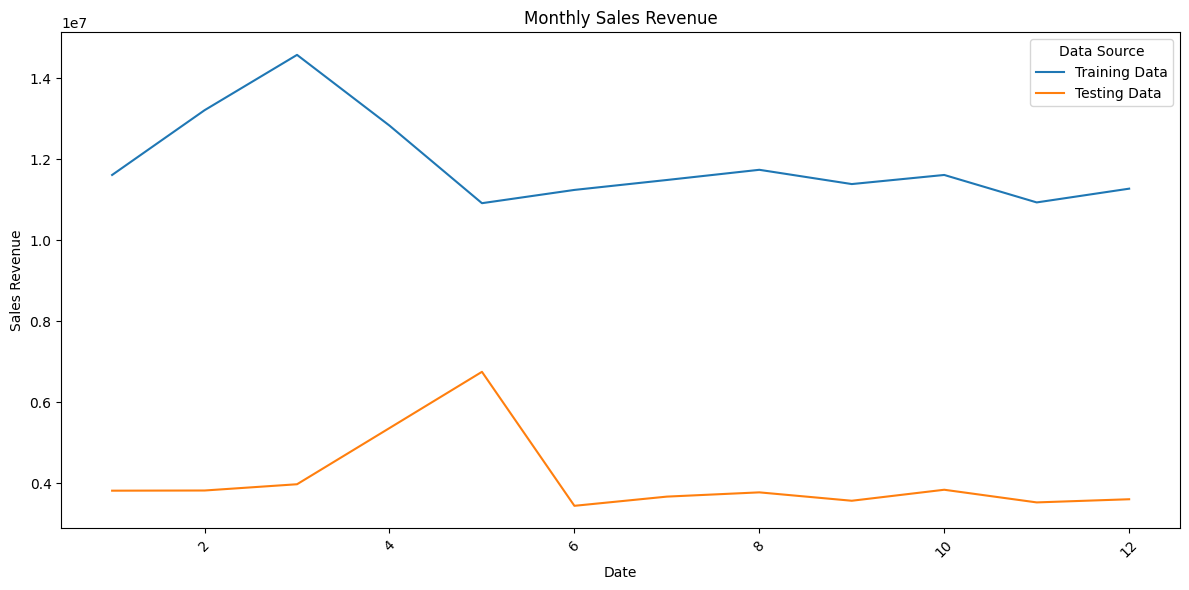

In [17]:
plot_time_series(df_train, 'month', 'sales_revenue', df_test, title='Monthly Sales Revenue', xlabel='Date', ylabel='Sales Revenue')


## 2.5 Feature Selection 

In [18]:
#Feature selection. Since the model is to predict the sales given date, item and store, choosing to have 
# 'day_name', 'month','store_id','debt_id'(which can be extracted from item_id later when captured thru UI)
columns_to_drop = ['id','item_id','cat_id','state_id','d','wm_yr_wk','day_index','sell_price','sales','event_type']
df_train = df_train.drop(columns=columns_to_drop)
X_test = df_test.drop(columns=columns_to_drop)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815174 entries, 0 to 34815173
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   dept_id        object        
 1   store_id       object        
 2   date           datetime64[ns]
 3   day_name       object        
 4   month          int32         
 5   sales_revenue  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 1.4+ GB


In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160986 entries, 0 to 12160985
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   dept_id        object        
 1   store_id       object        
 2   date           datetime64[ns]
 3   day_name       object        
 4   month          int32         
 5   sales_revenue  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 510.3+ MB


In [21]:
## Extracting the 'target' 
train_target = df_train.pop('sales_revenue')
y_test = df_test.pop('sales_revenue')

## 2.6 Feature Engineering - Add 'year' column since the sales revenue has gradually increased over the year and this can factor the year during prediction. 

In [22]:
# Create the 'year' column as a string in both dataframes
df_train['year'] = df_train['date'].dt.year.astype(str)
X_test['year'] = X_test['date'].dt.year.astype(str)

# Optionally, display the first few rows to confirm
print(df_train[['date', 'year']].head())
print(X_test[['date', 'year']].head())

        date  year
0 2011-01-29  2011
1 2011-01-29  2011
2 2011-01-29  2011
3 2011-01-29  2011
4 2011-01-29  2011
        date  year
0 2015-04-19  2015
1 2015-04-19  2015
2 2015-04-19  2015
3 2015-04-19  2015
4 2015-04-19  2015


## 2.7 Split Datasets

In [23]:
# Ensure the data is sorted by date
df_train = df_train.sort_values('date')

# Define the split date
split_date = '2015-03-03'  

# Split the dataset based on the split date
X_train = df_train[df_train['date'] < split_date]
X_val = df_train[df_train['date'] >= split_date]

y_train = train_target[df_train['date'] < split_date]
y_val = train_target[df_train['date'] >= split_date]

In [24]:
X_train.shape

(33405677, 6)

In [25]:
X_val.shape

(1409497, 6)

## 2.8 Drop the 'date' feature 

In [26]:
X_train = X_train.drop(columns='date')
X_val = X_val.drop(columns='date')
X_test = X_test.drop(columns='date')

In [27]:
## 2.7 Save the sets 

In [28]:
y_train_df = pd.DataFrame({'target': y_train})
y_val_df = pd.DataFrame({'target': y_val})
y_test_df = pd.DataFrame({'target': y_test})

# Training data
X_train.to_parquet('../../data/processed/X_train.parquet', index=False)
y_train_df .to_parquet('../../data/processed/y_train.parquet', index=False)

# Validation data
X_val.to_parquet('../../data/processed/X_val.parquet', index=False)
y_val_df.to_parquet('../../data/processed/y_val.parquet', index=False)

# Test data
X_test.to_parquet('../../data/processed/X_test.parquet', index=False)
y_test_df.to_parquet('../../data/processed/y_test.parquet', index=False)

# 3.0 Baseline Model

In [29]:
# Instantiate a NullRegressor and save it into a variable called base_model
base_model = NullRegressor()

In [30]:
# Make a prediction using fit_predict() and save the results in a variable called y_base
y_base = base_model.fit_predict(y_train)

In [31]:
# Display the RMSE and MAE scores of this baseline model
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

RMSE Training: 10.44
MAE Training: 5.31


In [32]:
# Display the RMSE and MAE scores of this baseline model on the validation set
print_regressor_scores(y_preds=base_model.predict(y_val), y_actuals=y_val, set_name='Validation')

RMSE Validation: 11.04
MAE Validation: 5.15


In [33]:
# Display the RMSE and MAE scores of this baseline model on the testing set
print_regressor_scores(y_preds=base_model.predict(y_test), y_actuals=y_test, set_name='Testing')

RMSE Testing: 11.31
MAE Testing: 5.23


# 4.0 Build Pipeline and Modelling 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer

In [35]:
# All the features are of type object. No numerical transformation is needed. So defining only categorical transformer
# Define the pipeline for one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [36]:
# Define the ColumnTransformer for all categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, X_train.columns) 
    ],
    remainder='drop'  
)

In [37]:
# Create a Pipeline called sgd_pipe that contains 2 steps preprocessor and another that instantiates a Linear regressor.
# stochastic gradient descent algorithm, which iteratively updates the model weights based on a subset of the data (mini-batches) rather than the entire dataset.Suitable for large-scale datasets
sgd_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('sgd', SGDRegressor(penalty='elasticnet', random_state=42)) 
    ]
)

In [38]:
# Fit sgd_pipe with training dataset
sgd_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['dept_id', 'store_id', 'day_name', 'month', 'year'], dtype='object'))])),
                ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

In [39]:
# Make predictions on training dataset and store the predictions in train_preds
train_preds = sgd_pipe.predict(X_train)

In [40]:
# Display the RMSE and MAE scores of sgd model
print_regressor_scores(y_preds=train_preds, y_actuals=y_train, set_name='Training')

RMSE Training: 10.40
MAE Training: 5.26


In [41]:
# Make predictions on validation dataset and print the performance scores
val_preds = sgd_pipe.predict(X_val)
print_regressor_scores(y_preds=val_preds, y_actuals=y_val, set_name='Validation')

RMSE Validation: 11.03
MAE Validation: 4.87


In [42]:
# Make predictions on test dataset and print the performance scores
test_preds = sgd_pipe.predict(X_test)
print_regressor_scores(y_preds=test_preds, y_actuals=y_test, set_name='Test')

RMSE Test: 11.35
MAE Test: 4.87


In [43]:
# Save the model 
# Import dump from joblib package and save sgd_pipe into models folder
from joblib import dump

dump(sgd_pipe,  '../../models/Predictive/sgd_pipeline.joblib')

['../../models/Predictive/sgd_pipeline.joblib']